# 축산물 이력 정보 유통재고 이상치 탐지

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 

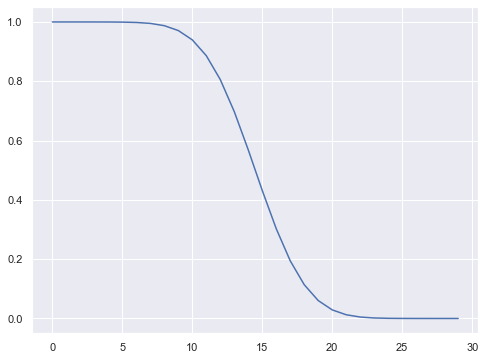

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
days = 30
x = np.linspace(-5, 5, days)
mu = 0; sigma = 1

y = stats.norm.cdf(x, mu, sigma)[::-1] # the normal cdf 
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(y)

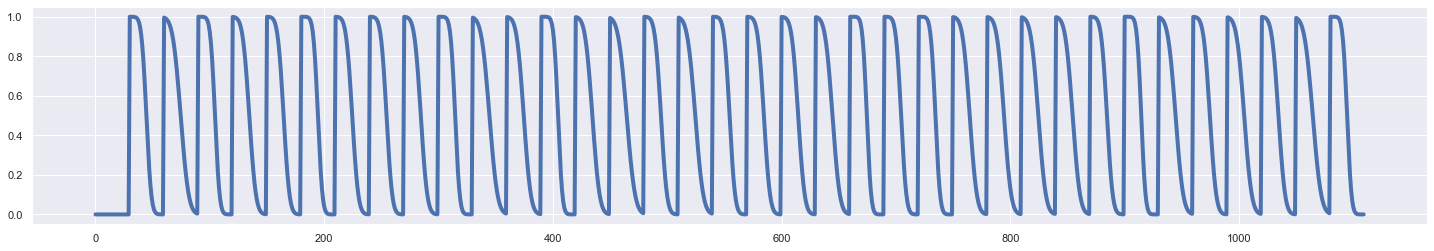

In [17]:
month = 36
data = np.zeros(days)
for i in range(month):
    sigma = 1 + np.random.random()
    b = stats.norm.cdf(x, mu, sigma)[::-1]
    data = np.hstack((data,b))        
plt.rcParams["figure.figsize"] = (25,4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True
plt.plot(data)

In [18]:
df = pd.DataFrame(np.arange(len(data)))

for i in range(100):
    
    data = np.zeros(days)
    for i in range(month):
        sigma = 1 + np.random.random()*2
        b = stats.norm.cdf(x, mu, sigma)[::-1]
        data = np.hstack((data,b))
        fbo = pd.DataFrame(data)

    df = df.merge(fbo, left_index=True, right_index=True,how='left')

In [19]:
df.columns = np.arange(101)
df.set_index(0, inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0.019347,0.029362,0.007948,0.017124,0.103107,0.001300,0.009732,0.111310,0.058443,0.095379,...,0.014167,0.011893,0.004592,0.084406,0.092688,0.049026,0.094382,0.085788,0.000425,0.108310
1106,0.011777,0.019213,0.004134,0.010204,0.083113,0.000487,0.005248,0.090817,0.042961,0.075937,...,0.008165,0.006646,0.002164,0.065895,0.073457,0.034998,0.075017,0.067150,0.000129,0.087990
1107,0.006923,0.012215,0.002049,0.005861,0.066186,0.000169,0.002705,0.073266,0.030976,0.059670,...,0.004524,0.003560,0.000963,0.050697,0.057438,0.024448,0.058841,0.051808,0.000036,0.070658


<AxesSubplot:xlabel='0'>

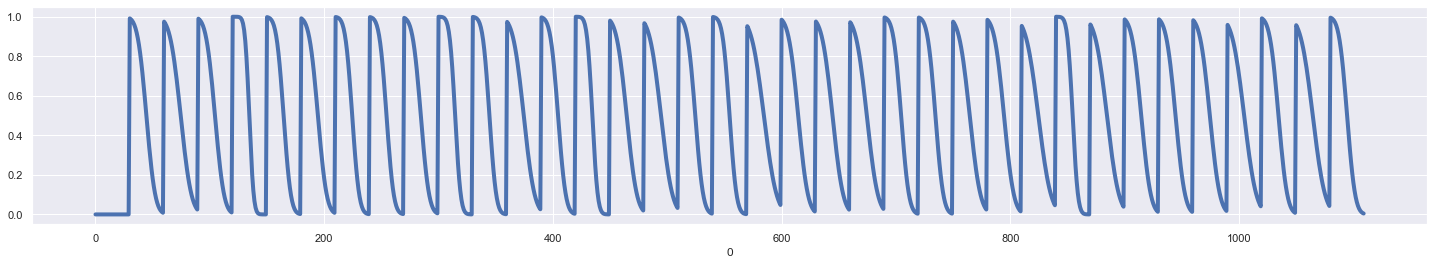

In [20]:
df[2].plot()

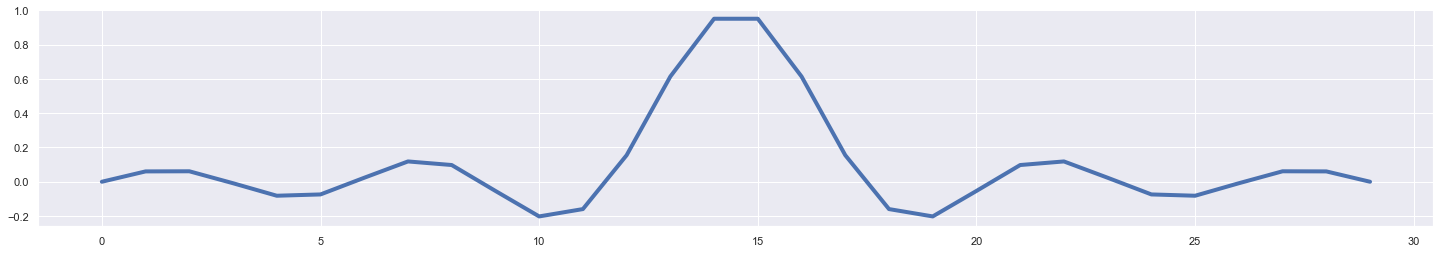

In [21]:
y = np.sinc(x)
plt.plot(y)

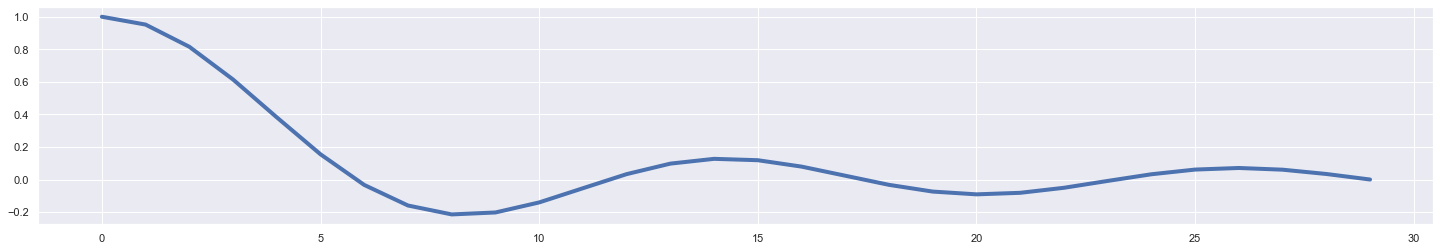

In [22]:
plt.plot(np.sinc(np.linspace(0, 5, days)))

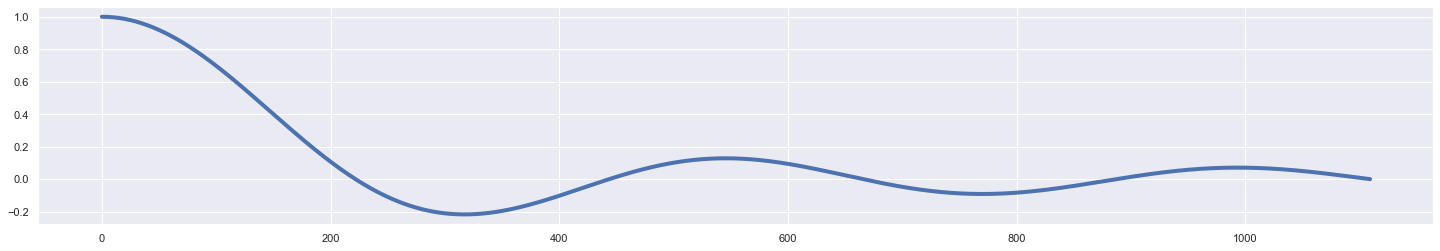

In [23]:
plt.plot(np.sinc(np.linspace(0, 5, len(df))))

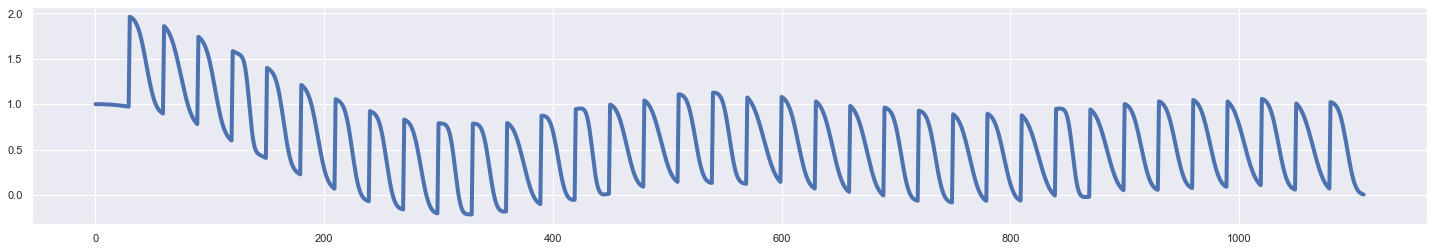

In [24]:
df[2] = df[2] + np.sinc(np.linspace(0, 5, len(df)))
plt.plot(df[2])

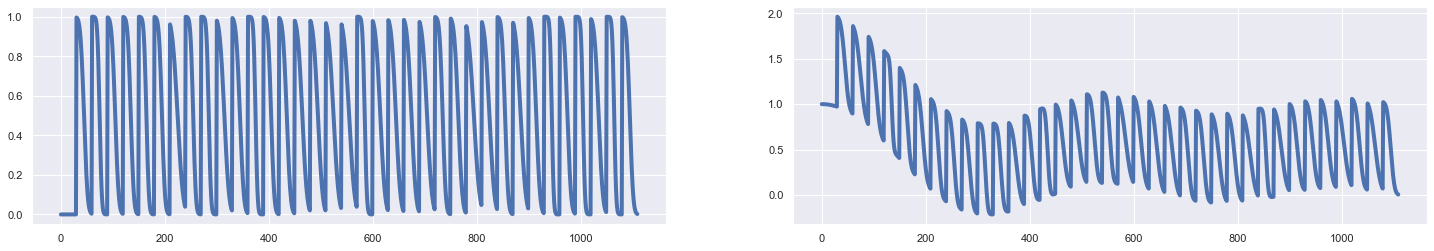

In [25]:
fig, ax = plt.subplots(ncols=2) # 1 row by 2 columns
ax[0].plot(df.index, df[1])
ax[1].plot(df.index,df[2])

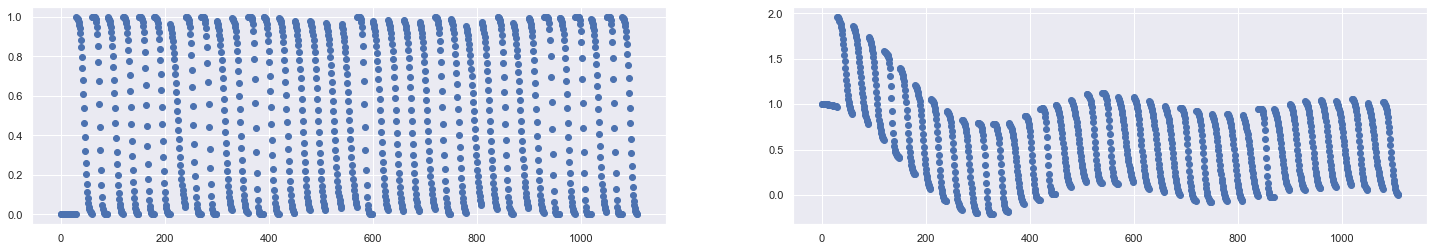

In [26]:
fig, ax = plt.subplots(ncols=2) # 1 row by 2 columns
ax[0].scatter(df.index, df[1])
ax[1].scatter(df.index,df[2])

In [94]:
df.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

In [95]:
df[np.arange(1,11)]

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,0.000000,0.999967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,0.000000,0.999866,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,0.000000,0.999699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,0.000000,0.999465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1105,0.074516,0.014619,0.018128,0.063241,0.105661,0.020174,0.081828,1.603088e-04,0.059810,0.057304
1106,0.057010,0.008775,0.010911,0.047099,0.085503,0.012370,0.063563,4.061930e-05,0.044135,0.041986
1107,0.042916,0.005006,0.006335,0.034441,0.068373,0.007330,0.048639,9.203461e-06,0.031954,0.030166


In [96]:
cols = np.arange(1,13)
data = df[cols]
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.999967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.999866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.999699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


IsolationForest()

Text(0.5, 1.0, '1')

IsolationForest()

Text(0.5, 1.0, '2')

IsolationForest()

Text(0.5, 1.0, '3')

IsolationForest()

Text(0.5, 1.0, '4')

IsolationForest()

Text(0.5, 1.0, '5')

IsolationForest()

Text(0.5, 1.0, '6')

IsolationForest()

Text(0.5, 1.0, '7')

IsolationForest()

Text(0.5, 1.0, '8')

IsolationForest()

Text(0.5, 1.0, '9')

IsolationForest()

Text(0.5, 1.0, '10')

IsolationForest()

Text(0.5, 1.0, '11')

IsolationForest()

Text(0.5, 1.0, '12')

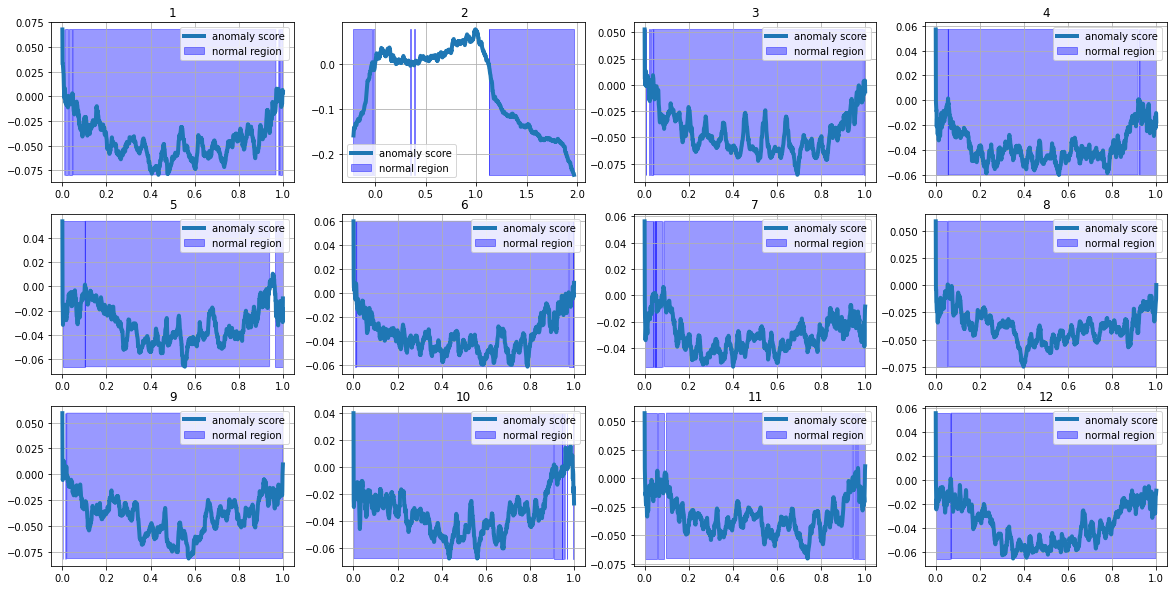

In [100]:
from sklearn.ensemble import IsolationForest
#Plotting the sub plot
fig, axs = plt.subplots(3, 4, figsize=(20, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = np.linspace(df[column].min(), df[column].max(), len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='blue', 
                     alpha=.4, label='normal region')
    axs[i].legend()
    axs[i].set_title(column)

# End